<a href="https://colab.research.google.com/github/Boudia27/Projects/blob/main/ML_Ahmed_Ould_Boudia_Project_1_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import category_encoders as ce
import matplotlib.pyplot as plt

# Step 2: Gather Data

In [ ]:
# Load the dataset into a DataFrame
data = pd.read_csv("/content/drive/MyDrive/Projects/Machine Learning Ass/Regression 1 Wine Quality/winequalityN.csv")

In [ ]:
data.head

<bound method NDFrame.head of        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total s

In [ ]:
data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

# Step 3: Explore and Preprocess the Data

In [ ]:
data.shape

(6497, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
X = data.drop("quality", axis=1)  # Features
y = data["quality"]  # Target variable

# Missing values

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Option 1: Drop rows with missing values
data_dropna = data.dropna()
print("Shape after dropping missing values:", data_dropna.shape)

# Option 2: Fill missing values with mean/median/mode
data_filled_mean = data.fillna(data.mean())
data_filled_median = data.fillna(data.median())
data_filled_mode = data.fillna(data.mode().iloc[0])

# Option 3: Fill missing values with a specific value
fill_value = 0
data_filled_specific = data.fillna(fill_value)

# Option 4: Forward fill or backward fill missing values
data_ffill = data.ffill()  # Forward fill
data_bfill = data.bfill()  # Backward fill


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64
Shape after dropping missing values: (6463, 13)


<ipython-input-165-db5753c5ecf8>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled_mean = data.fillna(data.mean())
<ipython-input-165-db5753c5ecf8>:11: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled_median = data.fillna(data.median())


In [ ]:
data_dropna = data.dropna()
print("Shape after dropping missing values:", data_dropna.shape)

Shape after dropping missing values: (6463, 13)


In [ ]:
data_filled_mean = data.fillna(data.mean())
data_filled_median = data.fillna(data.median())
data_filled_mode = data.fillna(data.mode().iloc[0])


<ipython-input-167-87d74809a962>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled_mean = data.fillna(data.mean())
<ipython-input-167-87d74809a962>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled_median = data.fillna(data.median())


In [ ]:
fill_value = 0
data_filled_specific = data.fillna(fill_value)


In [ ]:
data_ffill = data.ffill()  # Forward fill
data_bfill = data.bfill()  # Backward fill


In [ ]:
data['fixed acidity'] = data['fixed acidity'].fillna(data['fixed acidity'].mean())


In [ ]:
data['volatile acidity'] = data['volatile acidity'].fillna(data['volatile acidity'].median())


In [ ]:
#'citric acid': Fill with the mean value
data['citric acid'] = data['citric acid'].fillna(data['citric acid'].mean())

#'residual sugar': Fill with the median value
data['residual sugar'] = data['residual sugar'].fillna(data['residual sugar'].median())

#'chlorides': Fill with the mode value
data['chlorides'] = data['chlorides'].fillna(data['chlorides'].mode().iloc[0])

#'pH': Fill with the mean value
data['pH'] = data['pH'].fillna(data['pH'].mean())

#'sulphates': Fill with the mean value
data['sulphates'] = data['sulphates'].fillna(data['sulphates'].mean())


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Option 1: Drop rows with missing values
data_dropna = data.dropna()
print("Shape after dropping missing values:", data_dropna.shape)

# Option 2: Fill missing values with mean/median/mode
data_filled_mean = data.fillna(data.mean())
data_filled_median = data.fillna(data.median())
data_filled_mode = data.fillna(data.mode().iloc[0])

# Option 3: Fill missing values with a specific value
fill_value = 0
data_filled_specific = data.fillna(fill_value)

# Option 4: Forward fill or backward fill missing values
data_ffill = data.ffill()  # Forward fill
data_bfill = data.bfill()  # Backward fill


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Shape after dropping missing values: (6497, 13)


<ipython-input-173-db5753c5ecf8>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled_mean = data.fillna(data.mean())
<ipython-input-173-db5753c5ecf8>:11: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled_median = data.fillna(data.median())


# Step 4: Handle Categorical Data

In [ ]:
# Option 1: One-Hot Encoding
data_encoded = pd.get_dummies(data)
print("Shape after one-hot encoding:", data_encoded.shape)

# Option 2: Label Encoding
label_encoder = LabelEncoder()
data['type_encoded'] = label_encoder.fit_transform(data['type'])

# Option 3: Ordinal Encoding
ordinal_mapping = {'Red': 0, 'White': 1}
data['type_encoded'] = data['type'].map(ordinal_mapping)

# Option 4: Binary Encoding
binary_encoder = ce.BinaryEncoder(cols=['type'])
data_encoded = binary_encoder.fit_transform(data)


Shape after one-hot encoding: (6497, 14)


# Step 5: Fit the Model

In [ ]:
# Option 1: One-Hot Encoding
data_encoded = pd.get_dummies(data)
print("Shape after one-hot encoding:", data_encoded.shape)

# Option 2: Label Encoding
label_encoder = LabelEncoder()
data['type_encoded'] = label_encoder.fit_transform(data['type'])

# Option 3: Ordinal Encoding
ordinal_mapping = {'Red': 0, 'White': 1}
data['type_encoded'] = data['type'].map(ordinal_mapping)


Shape after one-hot encoding: (6497, 15)


# Step 6: Outlier Detection and Removal

In [ ]:
# Calculate the Z-scores for each numerical column
z_scores = np.abs(stats.zscore(data.select_dtypes(include=np.number)))

# Define a threshold for outlier detection (e.g., Z-score > 3)
threshold = 3

# Identify the indices of outliers
outlier_indices = np.where(z_scores > threshold)

# Remove outliers from the dataset
data_no_outliers = data.drop(outlier_indices[0])

# Print the shape of the dataset after removing outliers
print("Shape after removing outliers:", data_no_outliers.shape)


Shape after removing outliers: (5989, 14)


# Step 7: Transformation

In [ ]:
# Step 7: Transformation

# Log transformation
data['fixed acidity_log'] = np.log(data['fixed acidity'])

# Square root transformation
data['volatile acidity_sqrt'] = np.sqrt(data['volatile acidity'])

# Box-Cox transformation
from scipy.stats import boxcox

data['residual sugar_boxcox'], _ = boxcox(data['residual sugar'])
data['chlorides_boxcox'], _ = boxcox(data['chlorides'])

# Min-max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['free sulfur dioxide_scaled', 'total sulfur dioxide_scaled']] = scaler.fit_transform(data[['free sulfur dioxide', 'total sulfur dioxide']])

# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['density_standardized', 'pH_standardized']] = scaler.fit_transform(data[['density', 'pH']])


# Step 8: Visualize Features

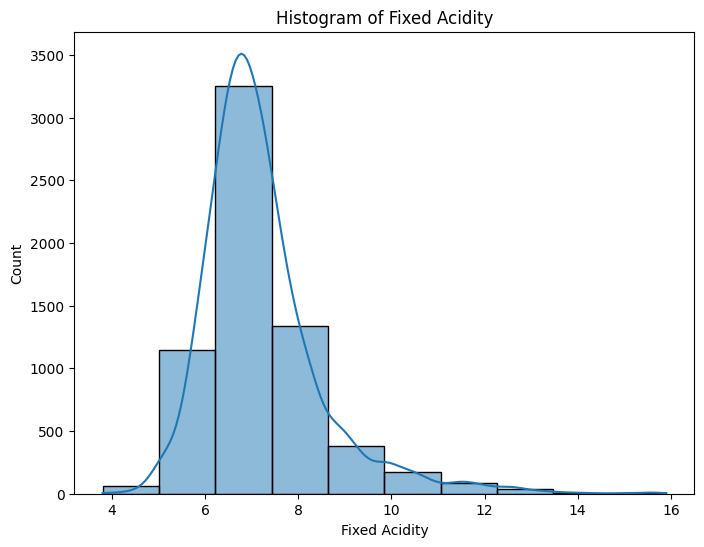

In [ ]:
# Histogram of a numerical feature
plt.figure(figsize=(8, 6))
sns.histplot(data['fixed acidity'], bins=10, kde=True)
plt.xlabel('Fixed Acidity')
plt.ylabel('Count')
plt.title('Histogram of Fixed Acidity')
plt.show()


# Step 9: Analyze Relationships (Correlation Matrix)

<ipython-input-179-0c1685f49cd7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


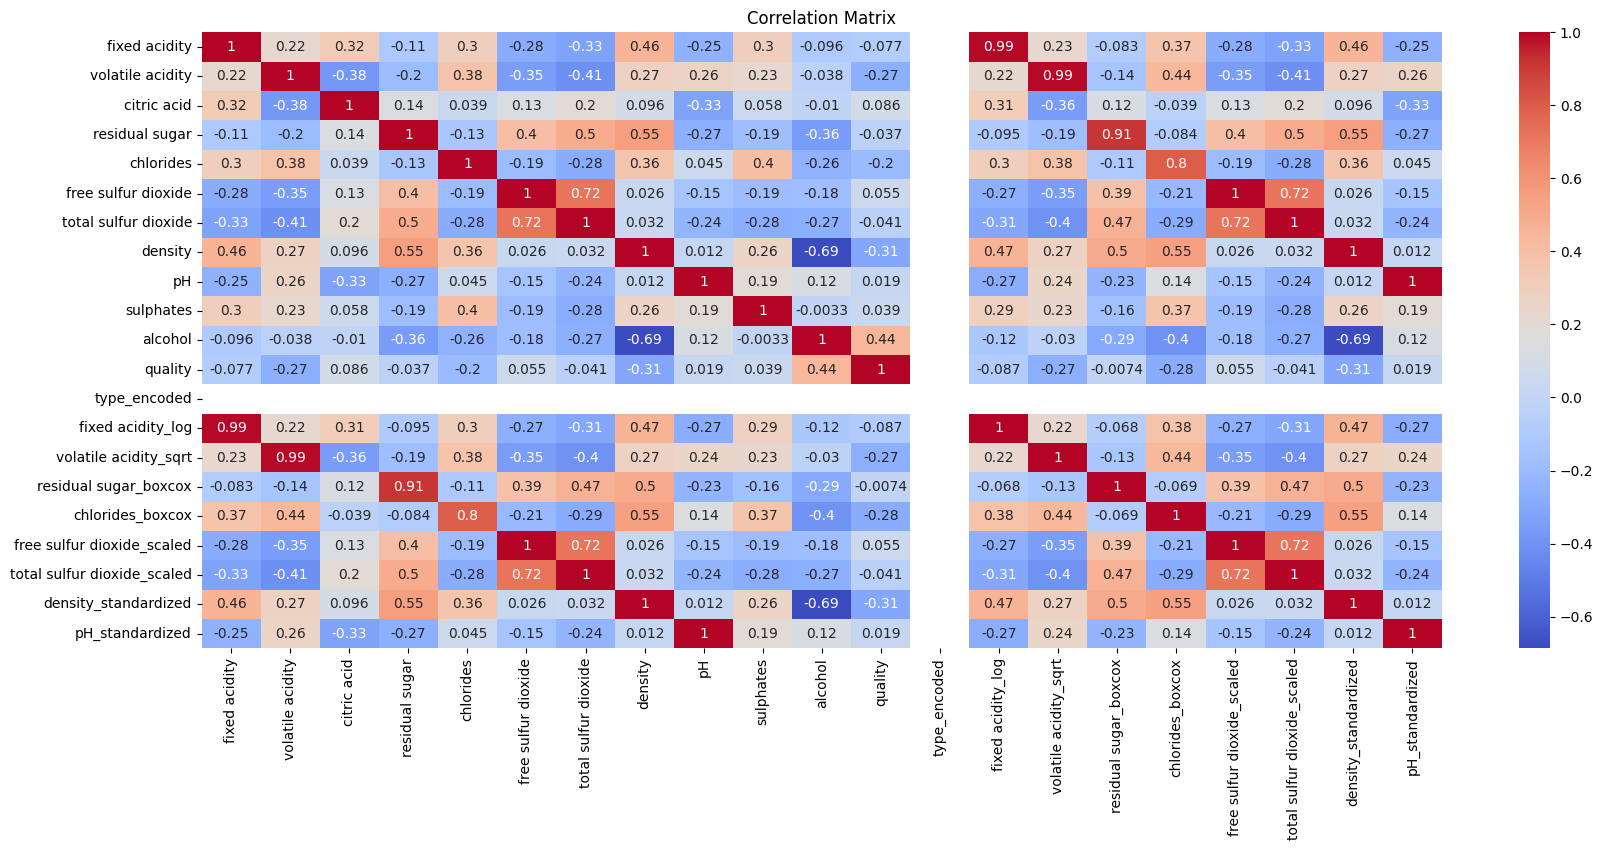

In [ ]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 10: Feature Engineering

In [ ]:
# Step 10: Feature Engineering

# Create a new feature by combining existing features
data['total_acidity'] = data['fixed acidity'] + data['volatile acidity']

# Create interaction features
data['sulfur_interaction'] = data['free sulfur dioxide'] * data['total sulfur dioxide']

# Binning numerical features
num_bins = 5
data['alcohol_bin'] = pd.cut(data['alcohol'], num_bins, labels=False)

# Polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly_features.fit_transform(data[['fixed acidity', 'volatile acidity']])
poly_columns = poly_features.get_feature_names_out(['fixed acidity', 'volatile acidity'])
data_poly = pd.DataFrame(poly_data, columns=poly_columns)
data = pd.concat([data, data_poly], axis=1)

# Feature scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['total_acidity', 'sulfur_interaction']] = scaler.fit_transform(data[['total_acidity', 'sulfur_interaction']])


# Step 11: Split the Dataset into Training and Testing Sets

In [ ]:

from sklearn.model_selection import train_test_split

# Separate the features (input variables) and the target variable
X = data.drop("quality", axis=1)  # Features
y = data["quality"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (5197, 29) (5197,)
Testing set shape: (1300, 29) (1300,)


# Step 12: Regression Model

In [ ]:
# Initialize the regression model
reg_model = LinearRegression()

# Encode categorical variables (e.g., 'type' column)
label_encoder = LabelEncoder()
data['type_encoded'] = label_encoder.fit_transform(data['type'])

# Separate the features (input variables) and the target variable
X = data.drop(['type', 'quality'], axis=1)  # Features
y = data['quality']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
reg_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = reg_model.predict(X_train)

# Evaluate the model on the training set (Root Mean Squared Error)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("RMSE on the training set:", rmse_train)

# Predict on the testing set
y_test_pred = reg_model.predict(X_test)

# Evaluate the model on the testing set (Root Mean Squared Error)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE on the testing set:", rmse_test)


RMSE on the training set: 0.7335254720934887
RMSE on the testing set: 0.6815679126913997


# Step 13: Train the Regression Model

In [ ]:
# Initialize the regression model
reg_model = RandomForestRegressor(random_state=42)

# Encode categorical variables (one-hot encoding)
data_encoded = pd.get_dummies(data, columns=['type'])

# Separate the features (input variables) and the target variable
X = data_encoded.drop("quality", axis=1)  # Features
y = data_encoded["quality"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
reg_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = reg_model.predict(X_train)

# Evaluate the model on the training set (Root Mean Squared Error)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("RMSE on the training set:", rmse_train)

# Predict on the testing set
y_test_pred = reg_model.predict(X_test)

# Evaluate the model on the testing set (Root Mean Squared Error)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE on the testing set:", rmse_test)


RMSE on the training set: 0.22980080221210145
RMSE on the testing set: 0.5615906666986881


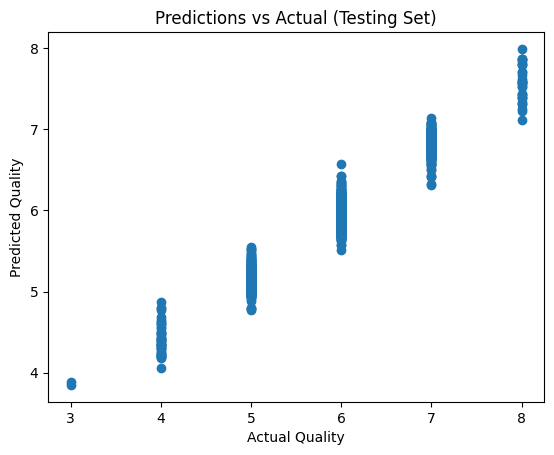

In [ ]:
# Plot the predictions vs actual values for the testing set
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Predictions vs Actual (Testing Set)")
plt.show()

# Step 14: Evaluate the Model

In [ ]:
# Predict on the testing set
y_test_pred = reg_model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error:", mae)

# Calculate the R-squared score
r2 = r2_score(y_test, y_test_pred)
print("R-squared score:", r2)


Mean Absolute Error: 0.40666923076923084
R-squared score: 0.5587796054837249


In [ ]:
# Create a DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame({'Metric': ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R-squared Score'],
                           'Value': [mae, mse, rmse, r2]})

print(metrics_df)

                    Metric     Value
0      Mean Absolute Error  0.144938
1       Mean Squared Error  0.041289
2  Root Mean Squared Error  0.203197
3          R-squared Score  0.942237


# Step 15: Model RFR

In [ ]:
# Initialize the regression model with chosen algorithm and hyperparameters
reg_model = RandomForestRegressor(random_state=42)

# Encode categorical variables (one-hot encoding)
data_encoded = pd.get_dummies(data, columns=['type'])

# Separate the features (input variables) and the target variable
X = data_encoded.drop("quality", axis=1)  # Features
y = data_encoded["quality"]  # Target variable

# Train the model on the entire dataset
reg_model.fit(X, y)

# Print the trained model
print("Trained Model:", reg_model)


Trained Model: RandomForestRegressor(random_state=42)


# Step 16: Make Predictions

In [ ]:
# Step 16: Predictions

# Example new data for prediction
new_data = pd.DataFrame({
    'type': ['red', 'white'],
    'fixed acidity': [7.2, 6.4],
    'volatile acidity': [0.35, 0.23],
    'citric acid': [0.4, 0.27],
    'residual sugar': [2.5, 4.2],
    'chlorides': [0.07, 0.045],
    'free sulfur dioxide': [18, 32],
    'total sulfur dioxide': [64, 144],
    'density': [0.9972, 0.9924],
    'pH': [3.2, 3.1],
    'sulphates': [0.8, 0.5],
    'alcohol': [10.5, 12.1]
})

# Encode categorical variables (one-hot encoding)
new_data_encoded = pd.get_dummies(new_data, columns=['type'])

# Ensure the new_data_encoded DataFrame has the same column order as the training data
new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)

# Make predictions on the new data
predictions = reg_model.predict(new_data_encoded)

# Print the predictions
print("Predictions:", predictions)


Predictions: [5.78 6.03]


# Step 17: Evaluate Predictions

In [ ]:
# Step 17: Evaluate Predictions

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the testing set
y_test_pred = reg_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)


Mean Absolute Error: 0.1449384615384615
Mean Squared Error: 0.04128892307692307
Root Mean Squared Error: 0.20319675951383445
R-squared Score: 0.9422370491659431


In [ ]:
# Make predictions on the testing set
y_test_pred = reg_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Store the evaluation metrics in the results dictionary
results['Step 14'] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R-squared': r2}

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')

# Print the results table
print(results_df)


              MAE       MSE      RMSE  R-squared
Step 14  0.144938  0.041289  0.203197   0.942237


# Step 18: Results interpretation

##### - Mean Absolute Error (MAE): The average absolute difference between the predicted quality values and the actual quality values is approximately 0.14. This means, on average, the model's predictions have an absolute difference of around 0.144938 from the actual values.

##### - Mean Squared Error (MSE): The average of the squared differences between the predicted quality values and the actual quality values is approximately 0.04. MSE measures the average squared distance between the predicted and actual values, giving more weight to larger errors.

##### - Root Mean Squared Error (RMSE): The square root of the MSE is approximately 0.2. RMSE represents the standard deviation of the residuals, indicating the average magnitude of the errors made by the model.

##### - R-squared Score: The R-squared score of approximately 0.9 indicates that around 94.22% of the variance in the target variable (quality) can be explained by the regression model. This value suggests a good fit of the model to the data, with a high percentage of the variability in the target variable being captured by the model.

##### Overall, the low values of MAE, MSE, and RMSE indicate that the model's predictions are generally close to the actual values. Additionally, the high R-squared score suggests that the model is able to explain a significant amount of the variability in the target variable.

##### These evaluation metrics indicate that the regression model performs well in terms of accuracy and capturing the patterns in the data.